# Face detection with OpenCV and deep learning
This is a code along project with pyimageserach.  
https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/ 

There will be small tweaks based on curiosity along the way to help understand in more detail some of the intracacies that may come along with the project.

To do later:  
-read https://www.pyimagesearch.com/2017/09/11/object-detection-with-deep-learning-and-opencv/ for how to train your own object detecter.  
-read https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/ to see how blobFromImage works for OpenCV

### Intro
You can perform fast and acucurate face detection with OpenCV using a pre-trained deep learning face detector model shipped with the library.  
OpenCV ships out-of-the-box with a pre-trained Haar cascades that can be used for face detection.

### Objectives
1. Find where the 'hidden' deep learning face detector lives in OpenCV
2. Perform face detection in images using OpenCV and deep learning
3. Perform face detection in video using OpenCV and deep learning

#### 'Hidden' Face Detector in OpenCV
in August 2017, OpenCV 3.3 was officially released bringing with it a highly improved deep neural network (ddn) model. The primary contributor Aleksandr Rybnikov included a more accurate deep learning-based face detector included in the official release of OpenCV (although it can be a bit hard to find if you don't know where to look). 


The Caffe-based face detector can be found in face_detector sub-directory of the dnn samples.

OpenCV's deep learning face detector is based on the Single Shot Director (SSD) framework with a ResNet base network.

For the first example we'll apply face detection with OpenCV to single input images.

### Detect Faces in Image

In [1]:
# import the necessary packages
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt
from imutils.video import VideoStream
import imutils
import time

%matplotlib inline

In [2]:
# paths config
image_file = 'pumpkin_patch.jpg'
caffe_deploy_path = 'deploy.prototxt.txt'
caffe_model = 'res10_300x300_ssd_iter_140000.caffemodel'
confidence_interval = 0.5

# picture configs
line_thickness = 10
text_thickness = 7
color = (255, 0, 0)
text_font_scale = 2

[INFO] loading model...
[INFO] computing object detections...


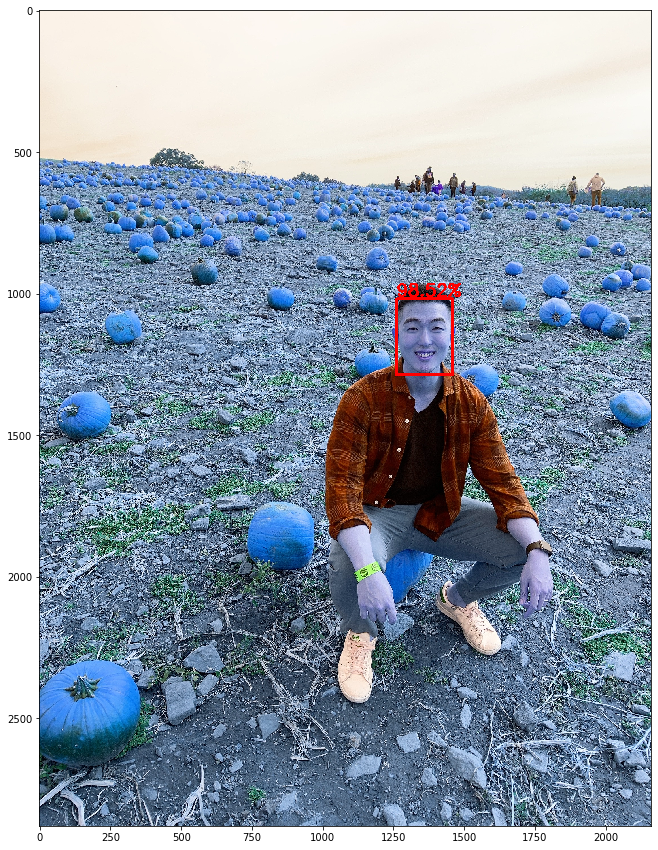

In [3]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(caffe_deploy_path, caffe_model)

# load the input image and construct an input blob for the image
# by resizing to a fixed 300x300 pixels and then normalizing it
image = cv2.imread(image_file)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0,
    (300, 300), (104.0, 177.0, 123.0))

# pass the blob through the network and obtain the detections and
# predictions
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

# loop over the detections
for i in range(0, detections.shape[2]):
    # extract the confidence (i.e., probability) associated with the
    # prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence
    if confidence > confidence_interval:
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
 
        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10 # shift 10 pixels in case text goes off plot
        cv2.rectangle(image, (startX, startY), (endX, endY),
            color, line_thickness)
        cv2.putText(image, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, text_font_scale, color, text_thickness)

# show the output image
# for desktop pop up
# cv2.imshow("Output", image)
# cv2.waitKey(0)

fig = plt.figure()
fig.set_size_inches(15,15)
plt.imshow(image)

It's impressive the state of where deep learning models are with being able to use a pre-trained model and start to detect faces in images in just a few lines of code.  
Let's now continue on to detect faces in videos.

### Detect Faces in Video

In [9]:
# load our serialized model from disk
print("[INFO] loading model...")
net = cv2.dnn.readNetFromCaffe(caffe_deploy_path, caffe_model)
# initialize the video stream and allow the camera sensor to warm up
print("[INFO] starting video stream...")
vs = VideoStream(src=0).start()
# for raspberry pi + picamera, replace vs with vs = VideoStream(usePiCamera=True).start()

time.sleep(2.0)

[INFO] loading model...
[INFO] starting video stream...


If you to parse a video file (rather than a video stream) swap out the VideoStream  class for FileVideoStream.  
More information: https://www.pyimagesearch.com/2017/02/06/faster-video-file-fps-with-cv2-videocapture-and-opencv/


In [8]:
# video configs
line_thickness = 2
text_thickness = 1
color = (0, 0, 255)
text_font_scale = 0.45

In [10]:
# loop over the frames from the video stream
while True:
    # grab the frame from the threaded video stream and resize it
    # to have a maximum width of 400 pixels
    frame = vs.read()
    frame = imutils.resize(frame, width=400)

    # grab the frame dimensions and convert it to a blob
    (h, w) = frame.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0,
        (300, 300), (104.0, 177.0, 123.0))

    # pass the blob through the network and obtain the detections and
    # predictions
    net.setInput(blob)
    detections = net.forward()
    
    # loop over the detections
    for i in range(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence = detections[0, 0, i, 2]
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence < confidence_interval:
            continue
        # compute the (x, y)-coordinates of the bounding box for the
        # object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        # draw the bounding box of the face along with the associated
        # probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(frame, (startX, startY), (endX, endY),
            color, line_thickness)
        cv2.putText(frame, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, text_font_scale, color, 2, text_thickness)
        
    # show the output frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break
        
# do a bit of cleanup
cv2.destroyAllWindows()
vs.stop()

In [11]:
# turn off video stream
vs.stream.release()